##Customer Segmentation using R
-Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.



First, we will perform data exploration

In [131]:
#Reading the csv
customer_data = read.csv("Mall_Customers.csv")
str(customer_data)


'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [93]:
names(customer_data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

Displaying the first six rows

In [94]:
head(customer_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [95]:
# Check for missing values in the dataset
sum(is.na(customer_data))

[1] 0

There are no missing values in the dataset

Using summary() to get statistical descriptions and sd() to get the standard deviation for the features

In [96]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [97]:
sd(customer_data$Age)

[1] 13.96901

In [98]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

In [99]:
sd(customer_data$Annual.Income..k..)

[1] 26.26472

In [100]:
sd(customer_data$Spending.Score..1.100.)

[1] 25.82352

Visualization of features to get additional insights from the data
First we will visualize the gender column

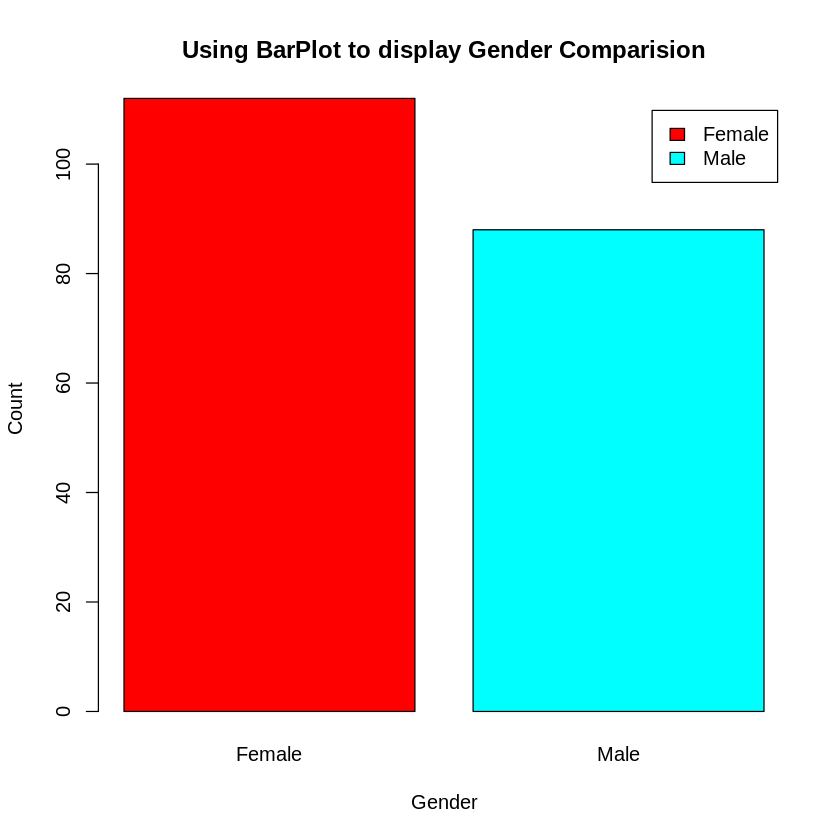

In [101]:
#Plotting a bar plot for gender class
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

From the above barplot, we observe that the number of females is higher than the males.

In [102]:
install.packages('plotrix')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



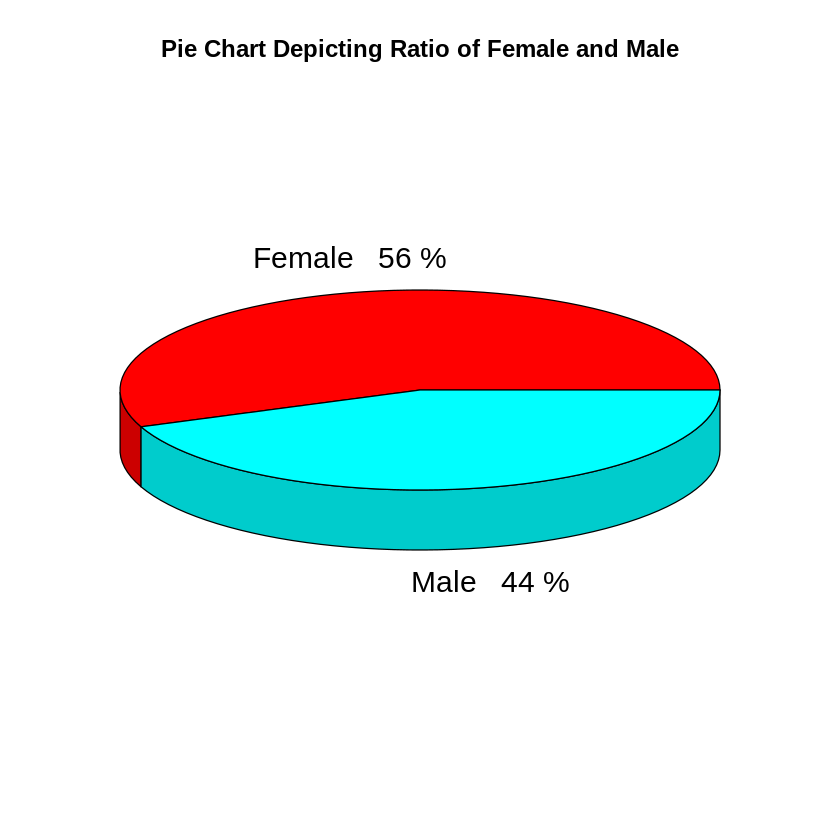

In [132]:
#Plotting a pie chart to show the ratio of females and males
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%.

Then we'll plot a histogram to show the count of Age Class

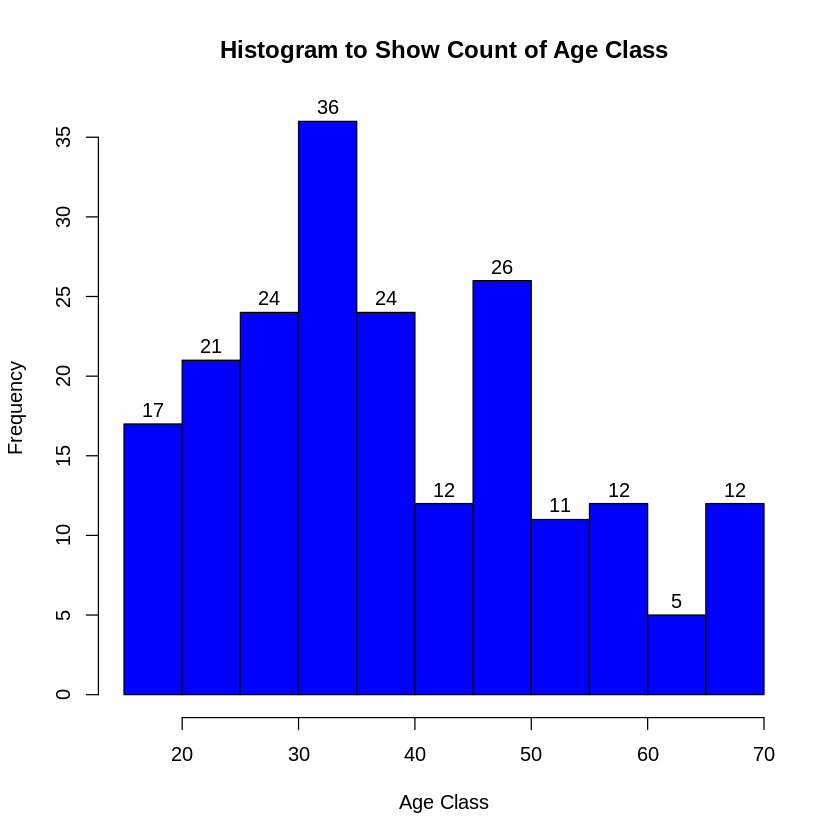

In [104]:
hist(customer_data$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

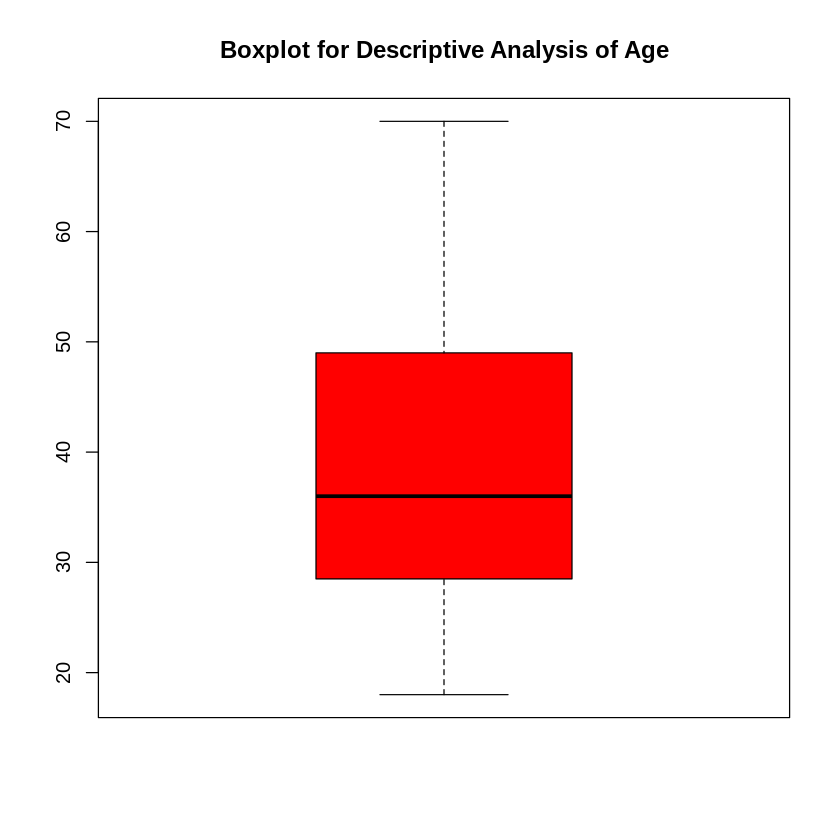

In [133]:
#Plotting a boxplot for the Age class
boxplot(customer_data$Age,
       col="red",
       main="Boxplot for Descriptive Analysis of Age")

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

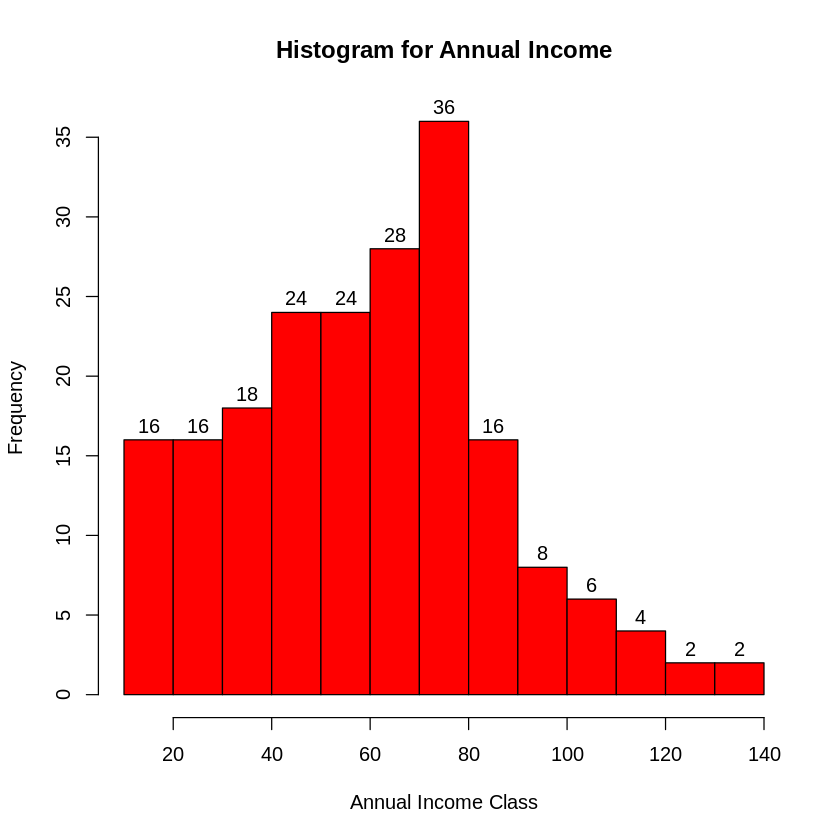

In [134]:
#Plotting a histogram for annual income class
hist(customer_data$Annual.Income..k..,
  col="red",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

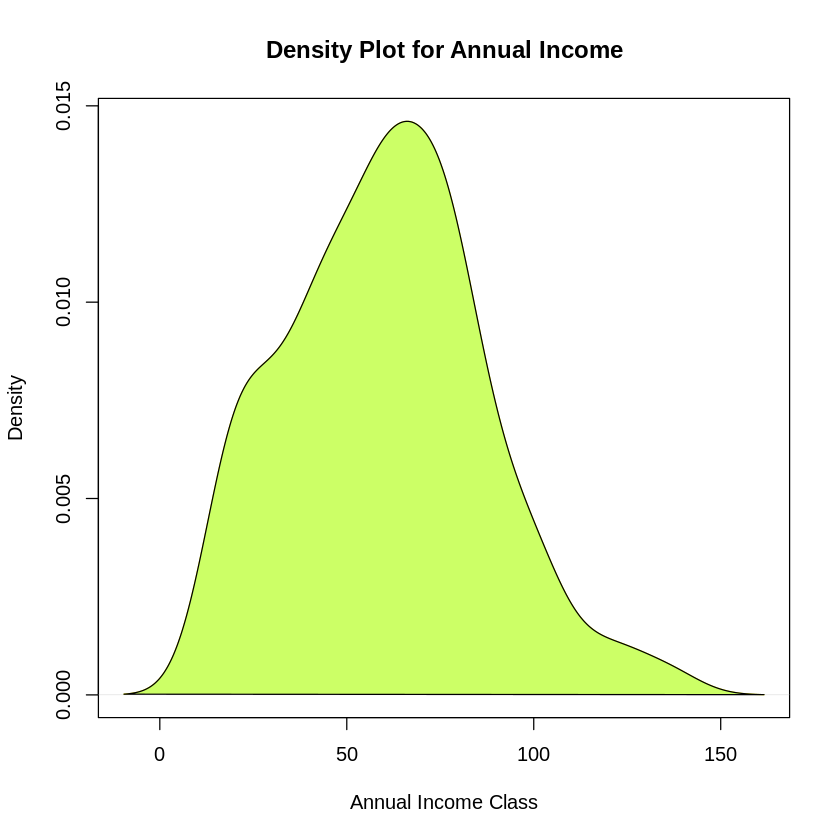

In [107]:
#Plotting a density plot
plot(density(customer_data$Annual.Income..k..),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. In the Kernel Density Plot that we displayed above, we observe that the annual income has a normal distribution.

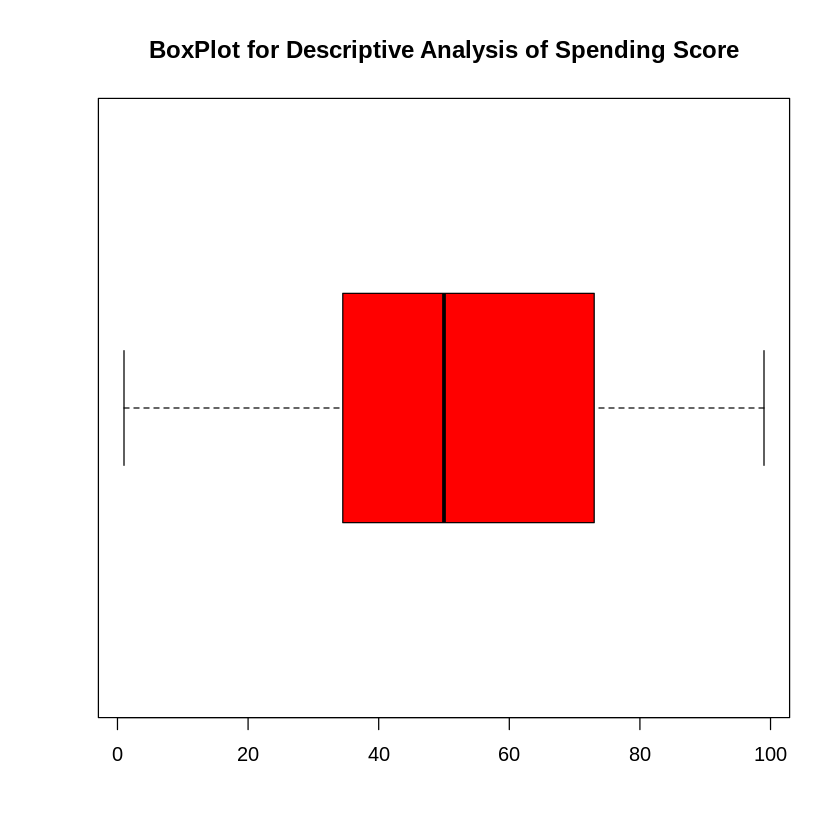

In [135]:
#Plotting a boxplot for Spending score
boxplot(customer_data$Spending.Score..1.100.,
   horizontal=TRUE,
   col="red",
   main="BoxPlot for Descriptive Analysis of Spending Score")

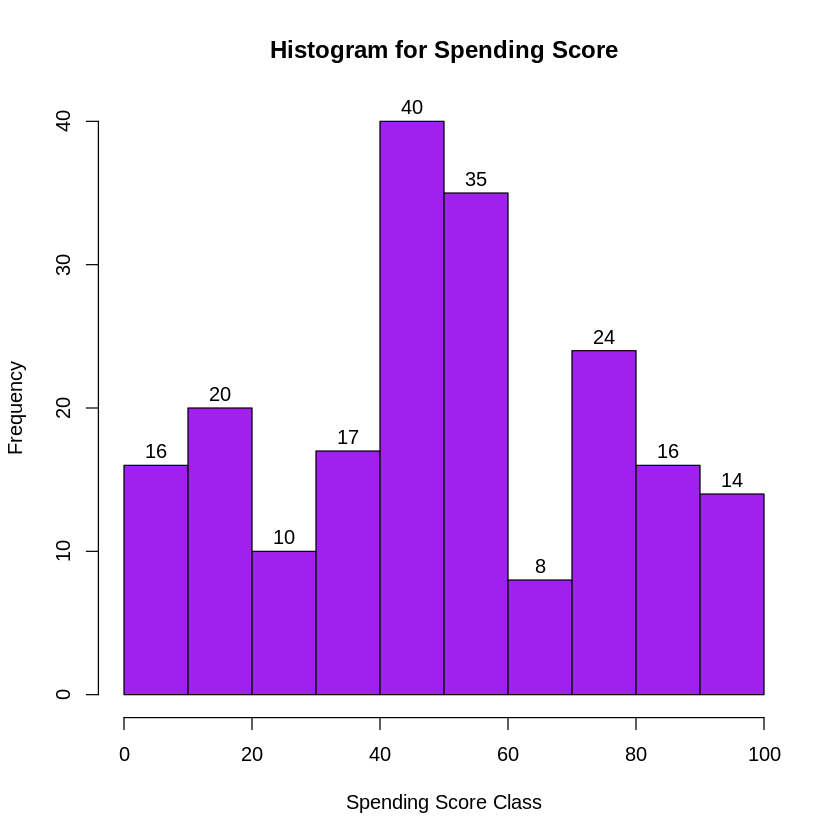

In [136]:
#Plotting a histogram for Spending Score
hist(customer_data$Spending.Score..1.100.,
    main="Histogram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="purple",
    labels=TRUE)

The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

In this project, we will use K-means Clustering algorithm to cluster the customers


K-Means is a clustering algorithm that helps group similar data points into **k clusters**. Here’s how it works:

1. **Choose k Clusters** – Decide how many groups (k) you want.  
2. **Pick Starting Points** – Randomly select k data points as the first "centers" (centroids).  
3. **Assign Data Points** – Each data point joins the closest centroid based on distance (usually Euclidean distance).  
4. **Recalculate Centers** – Find the new center (average) for each group.  
5. **Repeat Until Stable** – Keep reassigning data points and updating centers until no more changes occur.  

Once the algorithm stabilizes, the clusters formed represent meaningful patterns in the data!


## Determining the Optimal Number of Clusters  

When using K-Means clustering, choosing the right number of clusters (**k**) is crucial. To find the **optimal k**, we use the following methods:  

1. **Elbow Method**  
   - Measures how the total variance within clusters decreases as k increases.  
   - We plot the **Within-Cluster Sum of Squares (WCSS)** against k.  
   - The “elbow point” (where the decrease slows down) is the optimal k.  

2. **Silhouette Method**   
   - Evaluates how well each data point fits within its cluster.  
   - A higher **Silhouette Score** means better clustering.  
   - The optimal k maximizes this score.  

3. **Gap Statistic**   
   - Compares the clustering performance with randomly generated data.  
   - The optimal k is where the gap between real and random clustering is the largest.  



## Elbow Method   

The **Elbow Method** helps determine the optimal number of clusters (**k**) by measuring how compact the clusters are.  

### Steps:  
1. **Run K-Means** for different values of k (e.g., 1 to 10).  
2. **Calculate the Total Intra-Cluster Variation** (how tight the clusters are).  
3. **Plot the Results** – The **"elbow" or "knee" point** in the graph indicates the optimal k.  

At this point, adding more clusters does not significantly improve the clustering, making it the best choice!  


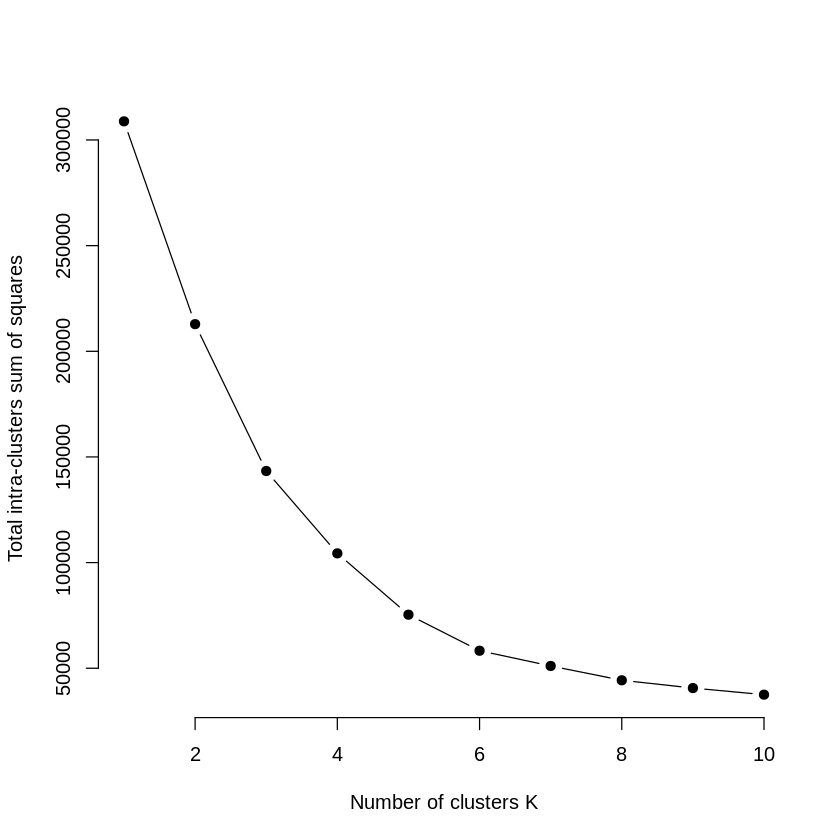

In [110]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE,
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

## Average Silhouette Method  

The **Average Silhouette Method** helps measure the quality of clustering by evaluating how well each data point fits within its assigned cluster. A higher silhouette score indicates better-defined clusters.  

### Steps:  
1. **Compute the Silhouette Score** for different values of k.  
2. **Evaluate Cluster Quality** – The silhouette score ranges from -1 to 1:  
   - **Close to 1** → Well-clustered  
   - **Close to 0** → Overlapping clusters  
   - **Negative** → Poor clustering  
3. **Find the Optimal k** – The best k is the one with the **highest average silhouette score**.  

We can calculate this using the `silhouette` function from the `cluster` package in R. This method helps ensure that the clusters are well-separated and meaningful for analysis.   


In [111]:
install.packages('gridExtra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



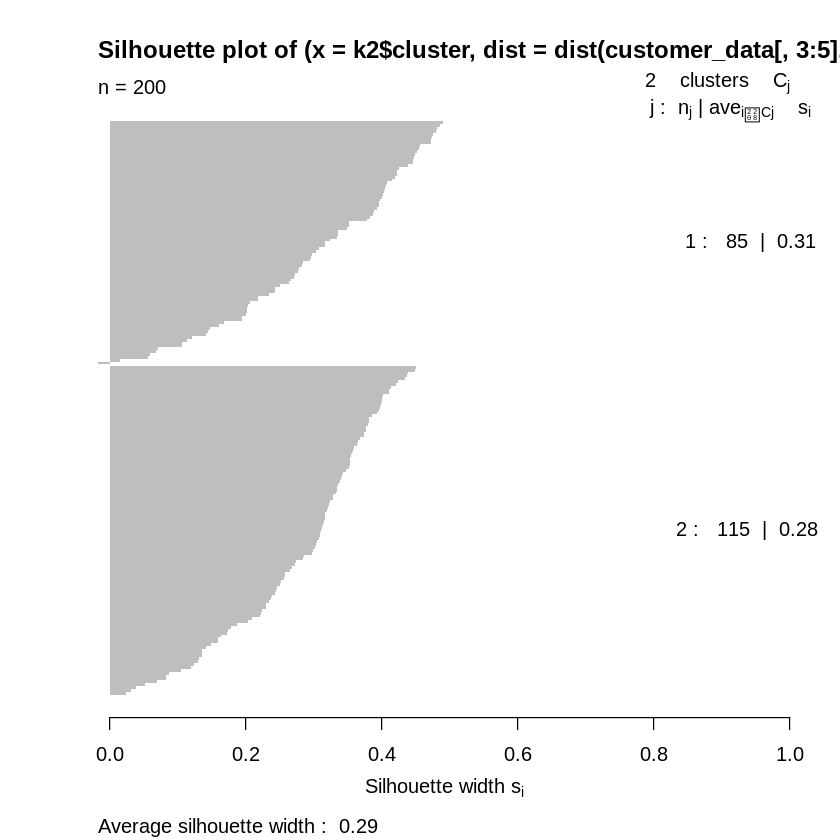

In [112]:
library(cluster)
library(gridExtra)
library(grid)


k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

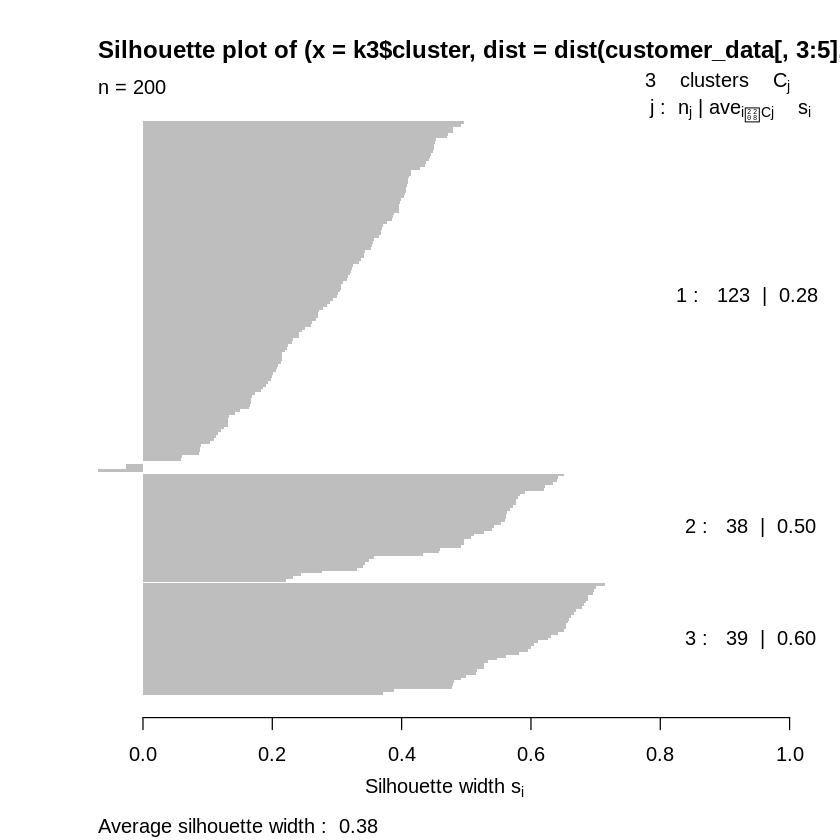

In [113]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

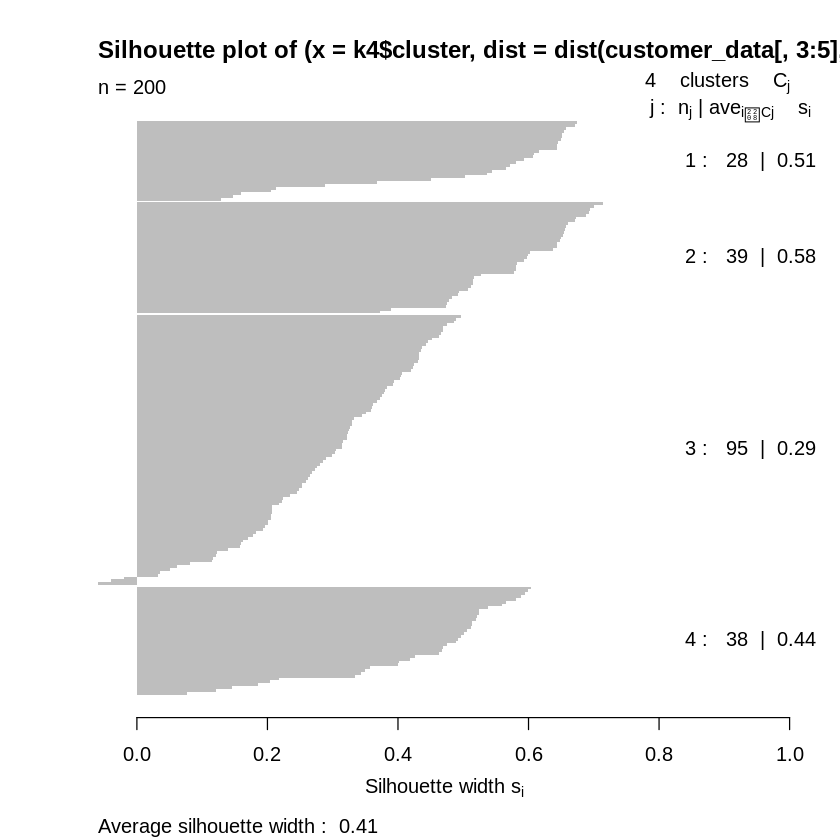

In [114]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

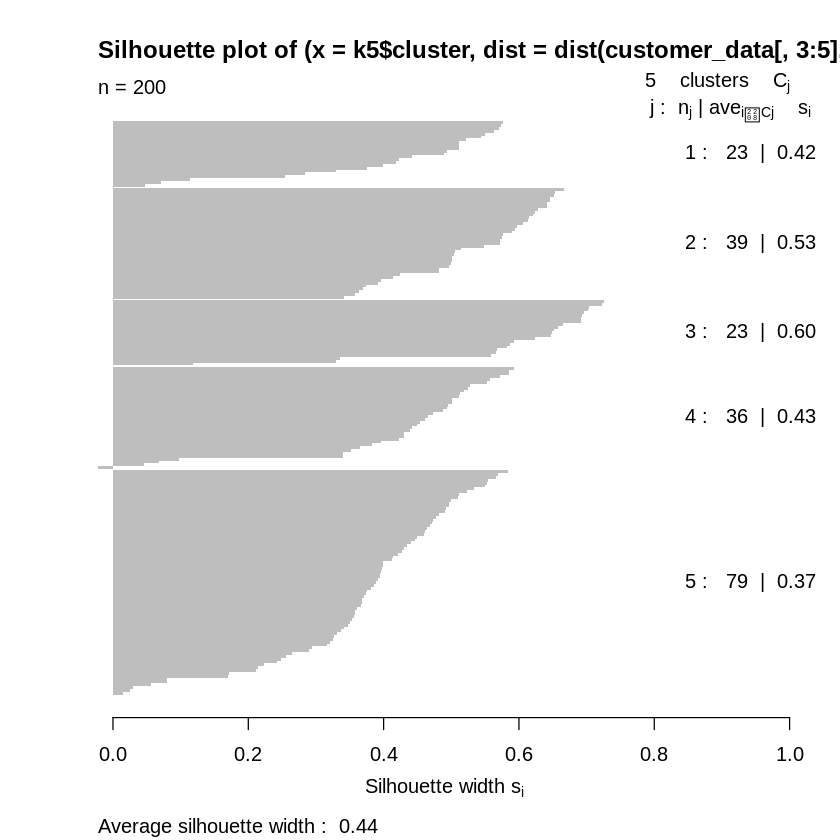

In [115]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

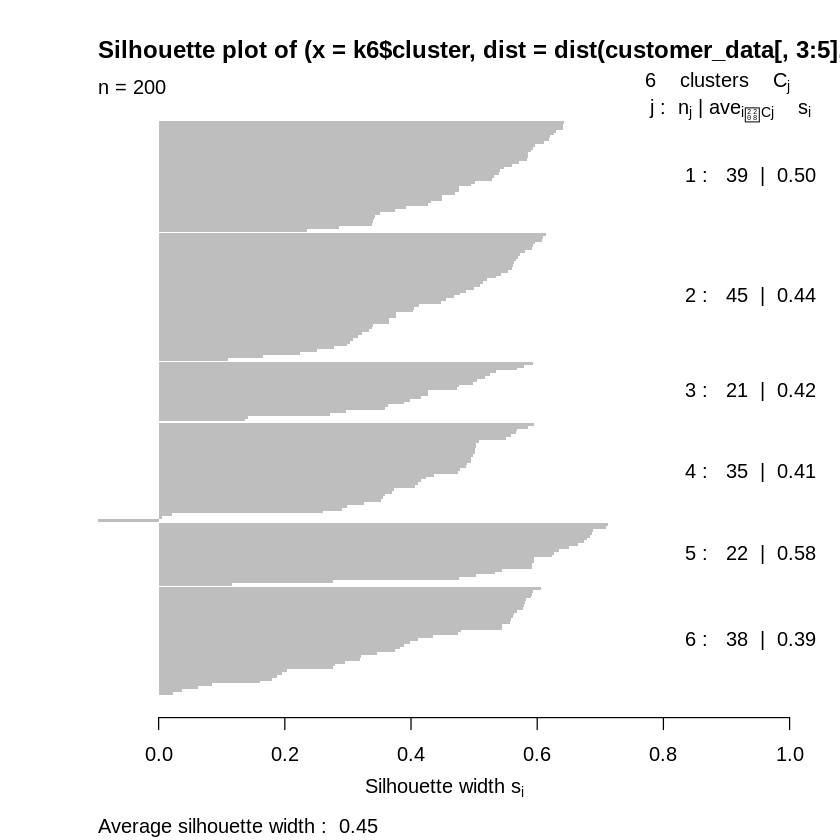

In [116]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))

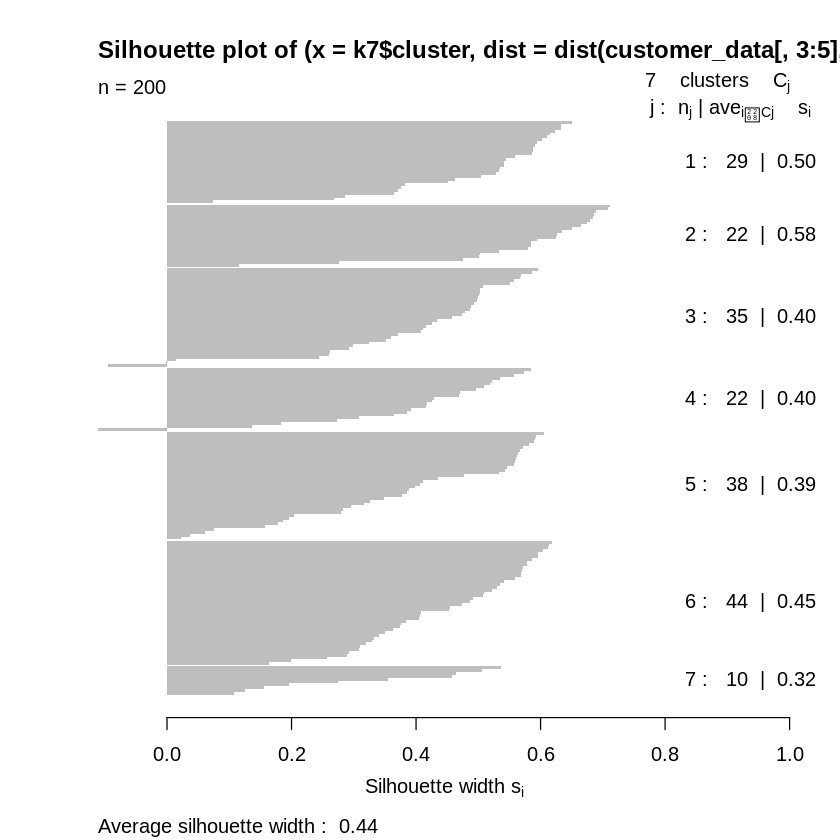

In [117]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

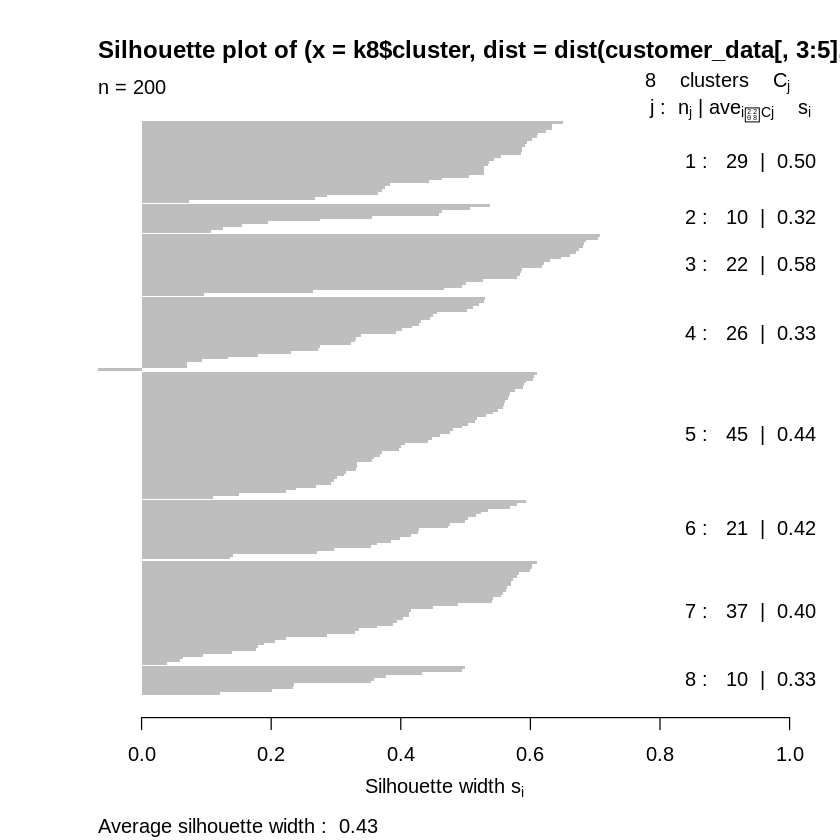

In [118]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

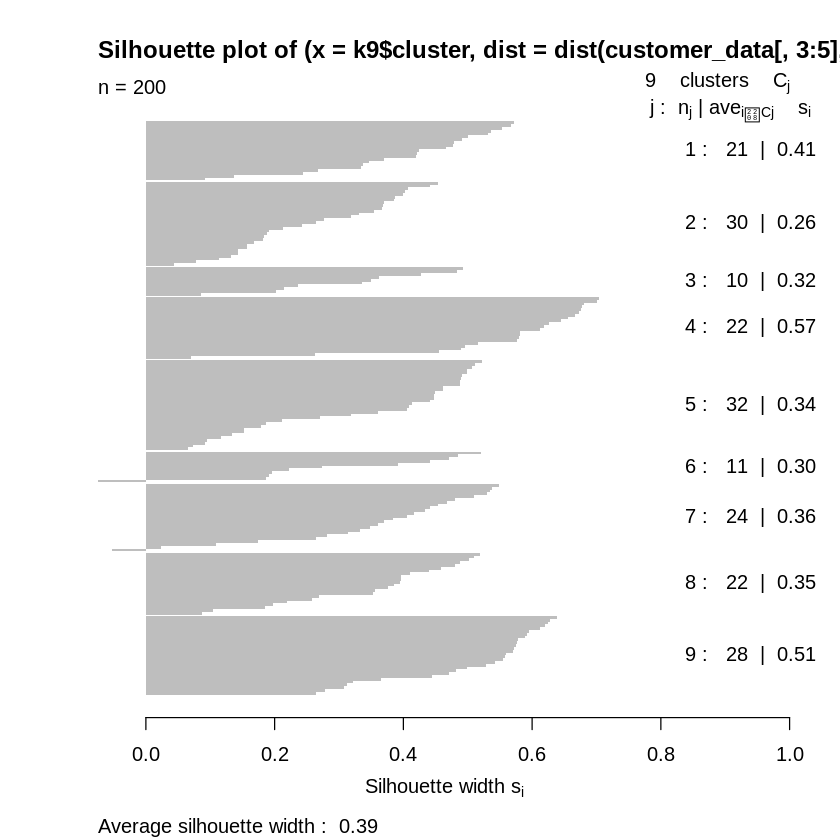

In [119]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

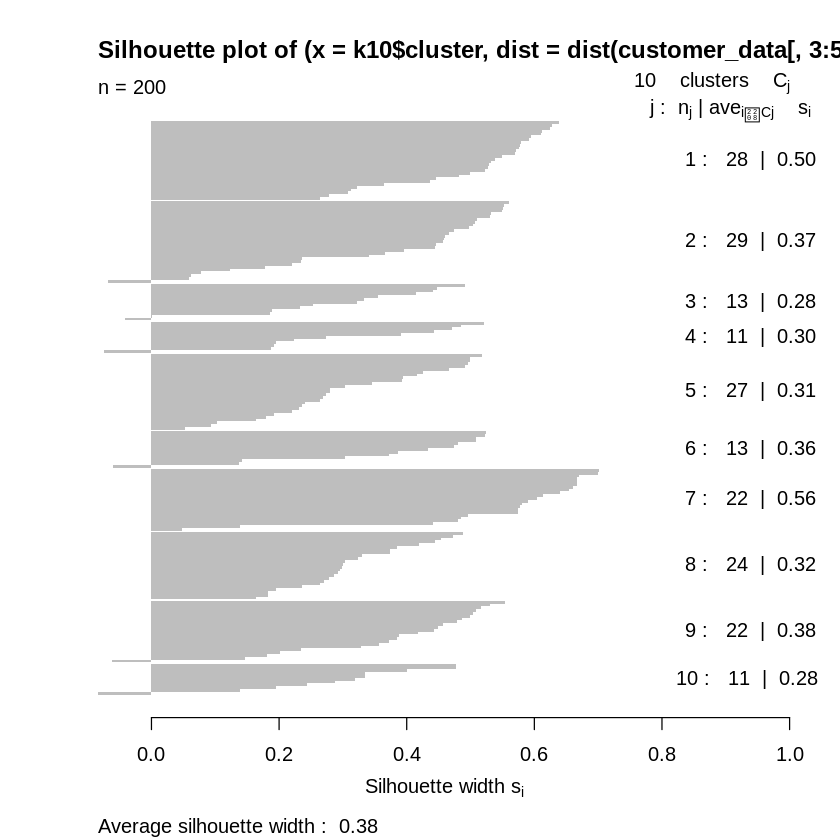

In [120]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

Now, we make use of the fviz_nbclust() function to determine and visualize the optimal number of clusters as follows

In [121]:
install.packages("NbClust")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [122]:
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



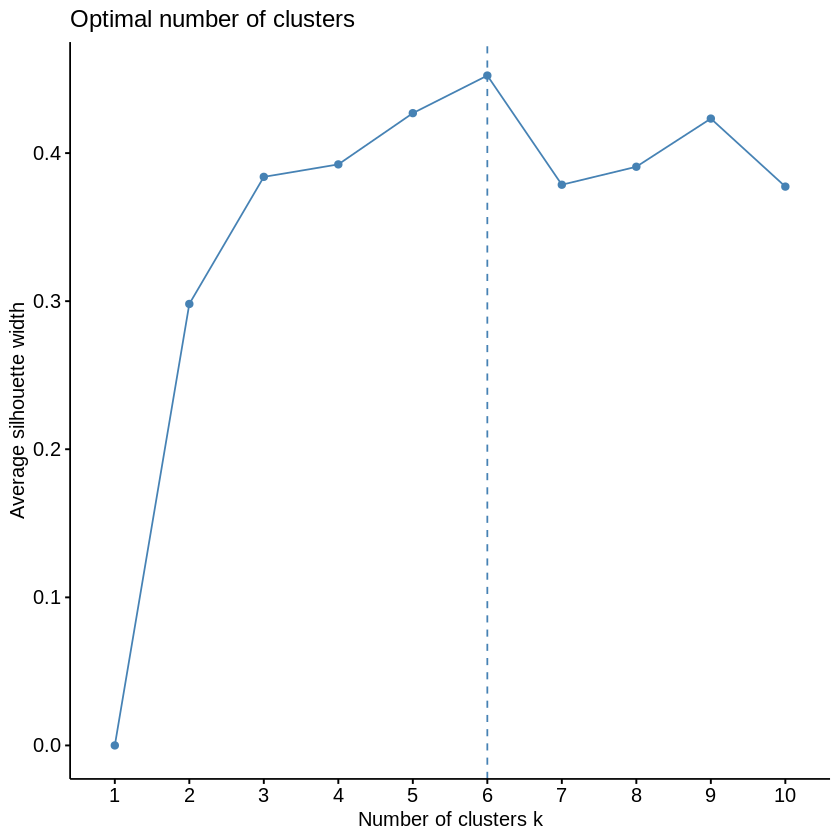

In [123]:
library(NbClust)
library(factoextra)

fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

From above, it seems the appropriate number of clusters should be 6

## Gap Statistic Method   

The **Gap Statistic Method**, introduced by researchers at Stanford University in 2001, helps determine the optimal number of clusters (**k**) by comparing clustering performance to a random dataset.  

### How It Works:  
1. **Generate Reference Data** – Create a random dataset with the same structure as the original.  
2. **Compare Cluster Variation** – Measure the total intra-cluster variation for different values of k.  
3. **Compute the Gap Statistic** – The gap is the difference between observed clustering performance and expected performance from random data.  
4. **Choose the Optimal k** – The best k is where the gap statistic is largest.  

In R, we can compute this using the `clusGap` function, which provides both the gap statistic and standard error for different k values.   


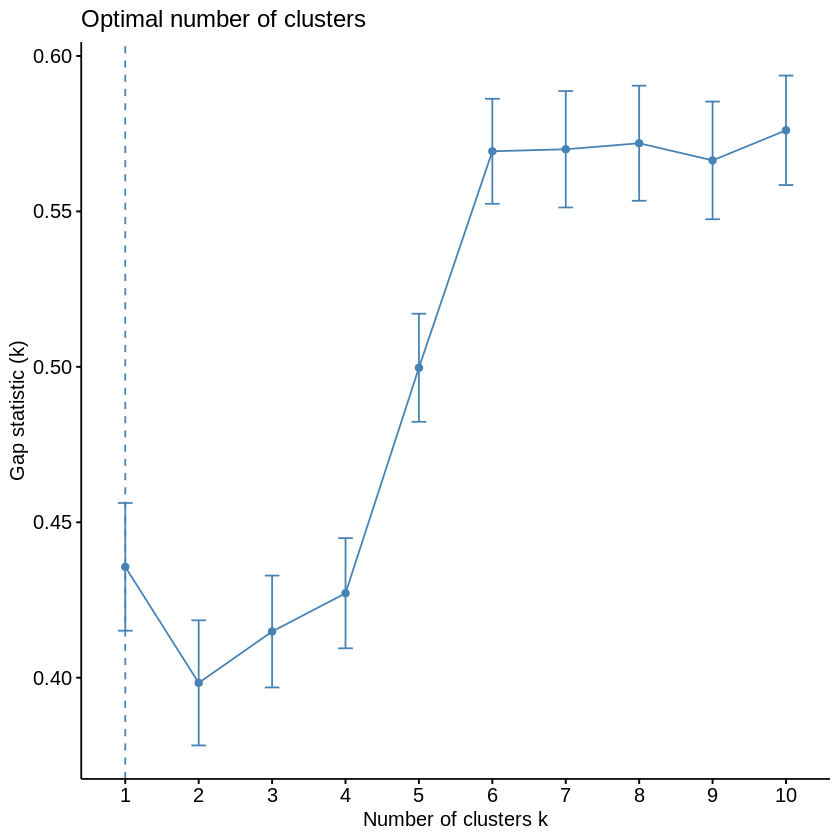

In [124]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
            K.max = 10, B = 50)
fviz_gap_stat(stat_gap)

Now, let us take k = 6 as our optimal cluster

In [125]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 35, 22, 38, 44, 22, 39

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 41.68571           88.22857               17.28571
2 44.31818           25.77273               20.27273
3 27.00000           56.65789               49.13158
4 56.34091           53.70455               49.38636
5 25.27273           25.72727               79.36364
6 32.69231           86.53846               82.12821

Clustering vector:
  [1] 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2
 [38] 5 2 5 4 5 2 3 2 5 4 3 3 3 4 3 3 4 4 4 4 4 3 4 4 3 4 4 4 3 4 4 3 3 4 4 4 4
 [75] 4 3 4 3 3 4 4 3 4 4 3 4 4 3 3 4 4 3 4 3 3 3 4 3 4 3 3 4 4 3 4 3 4 4 4 4 4
[112] 3 3 3 3 3 4 4 4 4 3 3 3 6 3 6 1 6 1 6 1 6 3 6 1 6 1 6 1 6 1 6 3 6 1 6 1 6
[149] 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6 1
[186] 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6

Within cluster sum of squares by cluster:
[1] 16690.857  8189.000  7742.895  7607.477  40

## Key Outputs of K-Means Clustering

After running the K-Means algorithm, we obtain several important metrics:  

- **cluster** – A vector indicating which cluster each data point belongs to.  
- **totss** – The total sum of squares, measuring overall data spread.  
- **centers** – A matrix containing the coordinates of cluster centers.  
- **withinss** – The intra-cluster sum of squares for each cluster (how compact clusters are).  
- **tot.withinss** – The total intra-cluster sum of squares (sum of all withinss values).  
- **betweenss** – The sum of squares between clusters (measuring separation).  
- **size** – The number of data points in each cluster.  

These metrics help evaluate clustering quality and interpret results effectively.


Visualizing the Clustering Results using the First Two Principle Components

In [126]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4625 26.1597 12.9317
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

In [127]:
pcclust$rotation[,1:2]

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


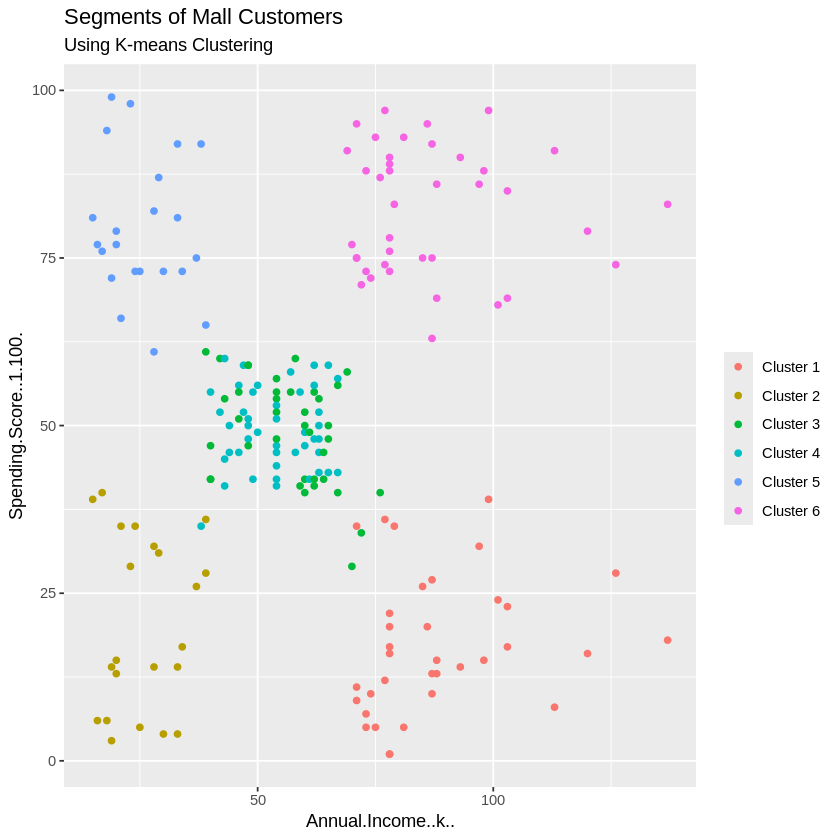

In [128]:
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
              breaks=c("1", "2", "3", "4", "5","6"),
              labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

### Cluster Distribution Analysis

From the visualization, we observe **6 distinct customer clusters** based on annual income and spending patterns:

- **Cluster 3 & 4**:  
  Represent customers with **medium annual income** and **medium annual expenditure**.

- **Cluster 6**:  
  Comprises customers with **high annual income** and **high annual expenditure** (likely premium shoppers).

- **Cluster 2**:  
  Characterizes customers with **low annual income** and **low annual expenditure** (budget-conscious segment).

- **Cluster 1**:  
  Includes customers with **high annual income** but **low annual expenditure** (potential savers or infrequent shoppers).

- **Cluster 5**:  
  Contains customers with **low annual income** but **high annual expenditure** (high-risk group with unbalanced spending habits).

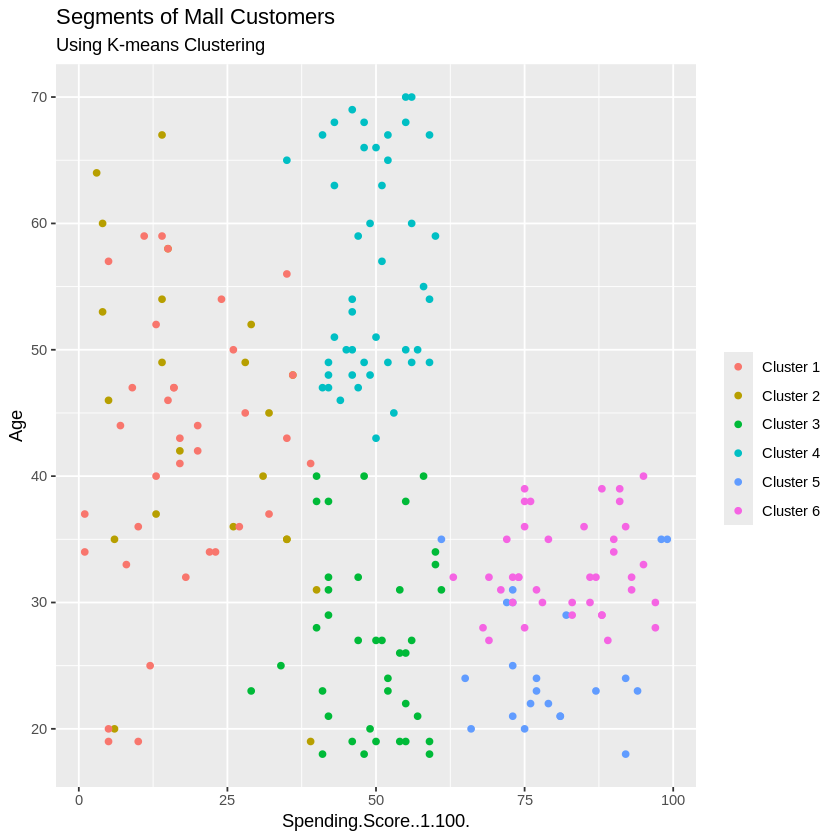

In [129]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                      breaks=c("1", "2", "3", "4", "5","6"),
                      labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

Here Cluster 1 and 2 are quite spread across in the y axis, at low spending score

Cluster 3 and 4 show the medium annual expenditure

Cluster 5 and Cluster 6 show high annual expenditure at ages less than 40


The age and spending score relation does not help us in gaining insights

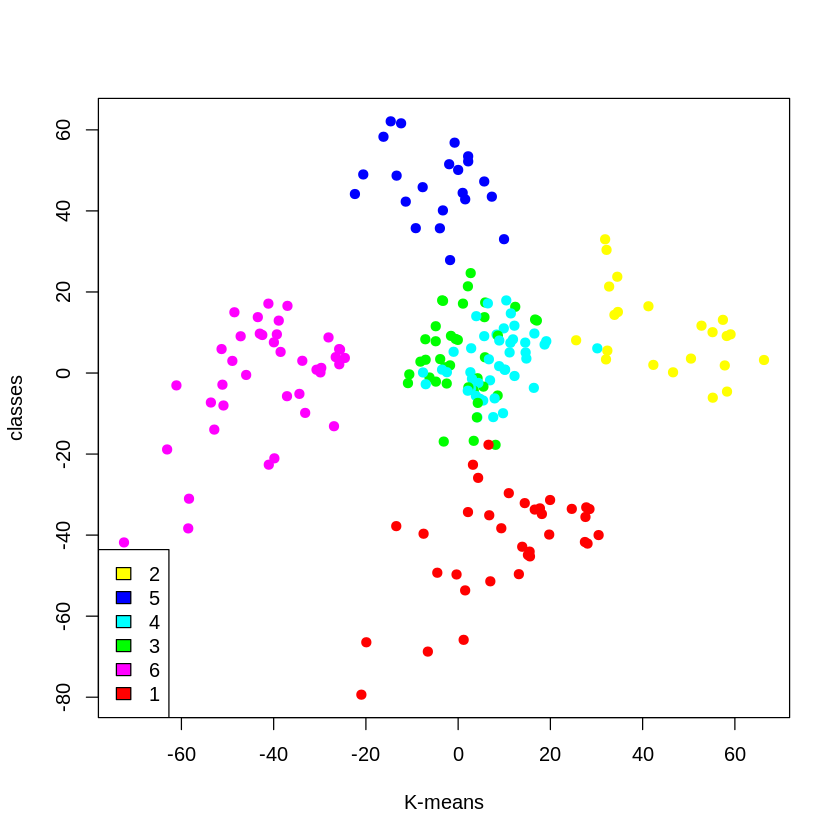

In [130]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

digCluster<-k6$cluster; dignm<-as.character(digCluster); # K-means clusters

plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))

Cluster 3 and 4 – These two clusters consist of customers with medium PCA1 and medium PCA2 score.

Cluster 6 – This cluster represents customers having a high PCA2 and a low PCA1.

Cluster 1 – In this cluster, there are customers with a medium PCA1 and a low PCA2 score.

Cluster 2 – This cluster comprises of customers with a high PCA1 income and a high PCA2.

Cluster 5 – This comprises of customers with a high PCA2 and a medium annual spend of income.

## Business Insights from Customer Segmentation

Based on the clustering results, we identified distinct customer segments in the mall's customer base. These insights help in developing targeted marketing strategies, improving customer experience, and optimizing revenue generation.

### 1. High-Income, High-Spending Customers (Premium Shoppers)
- These customers have a high annual income and a high spending score.
- They prefer luxury brands, premium products, and exclusive shopping experiences.
- **Business Strategy:**
  - Offer VIP memberships, personalized shopping assistance, and early access to new arrivals.
  - Provide premium services like lounge areas, valet parking, and high-end brand collaborations.

### 2. High-Income, Low-Spending Customers (Potential High-Value Shoppers)
- These customers can afford to spend more but currently make limited purchases.
- They may require more incentives or personalized engagement to increase spending.
- **Business Strategy:**
  - Introduce loyalty programs with exclusive discounts and cashback offers.
  - Provide targeted advertisements and promotions on premium products.

### 3. Low-Income, High-Spending Customers (Impulse Buyers)
- Customers in this category spend a significant portion of their income on shopping.
- They are likely drawn to trendy and promotional offers.
- **Business Strategy:**
  - Implement frequent flash sales, discounts, and bundled offers to encourage repeat visits.
  - Use social media marketing and influencer collaborations to appeal to their shopping behavior.

### 4. Low-Income, Low-Spending Customers (Budget-Conscious Shoppers)
- These customers are highly price-sensitive and prioritize affordability over brand value.
- They mainly shop for necessities and discounted items.
- **Business Strategy:**
  - Offer economy product lines, seasonal discounts, and coupon-based savings.
  - Improve customer engagement through referral programs and group-buying discounts.

### 5. Moderate-Income, Moderate-Spending Customers (Balanced Shoppers)
- These customers maintain a stable shopping pattern with neither excessive spending nor extreme frugality.
- They prefer a balance between quality and affordability.
- **Business Strategy:**
  - Implement personalized product recommendations based on purchase history.
  - Provide value-added services such as loyalty rewards, installment payment options, and membership perks.

---

## Final Conclusion

This project successfully segmented mall customers using clustering techniques, allowing us to identify distinct shopping behaviors. The insights gained can help mall management and retail brands:

- **Enhance marketing strategies** by targeting different customer segments effectively.
- **Optimize inventory management** based on shopping patterns.
- **Improve customer experience** by providing personalized offers and services.
- **Boost sales and retention** by implementing loyalty programs and tailored promotions.

Future improvements could involve integrating additional customer attributes (e.g., purchase frequency, brand preferences) and testing advanced clustering models like DBSCAN or Gaussian Mixture Models for refined segmentation.
